# Coursera Capstone Project
### The Battle of Neighborhoods - Final Report (Week 1 and 2)¶
### Kai Tan

In [30]:
import numpy as np # library to handle data in a vectorized manner
import time
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
import folium # map rendering library
from folium import plugins

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans



print('Libraries imported.')

usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab
usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: # uncomment this line if you haven't completed the Foursquare API lab


Libraries imported.


%%html

# Coursera Capstone - REPORT
### Content
<b>Introduction Section :</b>

1.1 Discussion of the "backgroung situation" leading to the problem at hand:

1.2 Problem to be resolved

1.3 Audience for this project.

<b>Data Section:</b>

2.1 Data of Current Situation (current residence place)

2.2 Data required to resolve the problem

2.3 Data sources and data manipulation

<b>Methodology section :</b>

3.1 Process steps and strategy to resolve the problem

3.2 Data Science Methods, machine learing, mapping tools and exploratory data analysis.

<b>Results section</b>

Discussion of the results and how they help to take a decision.

<b>Discussion section</b>

Elaboration and discussion on any observations and/or recommendations for improvement.

<b>Conclusion section</b>

Desicison taken and Report Conclusion.

# 1. Introduction Section :
## Discussion of the business problem and the audience who would be interested in this project.
### 1.1 Scenario and Background
I am a student currently residing in Downtown, Singapore. I enjoy many ammenities in the neighborhood ,such as cousine restaurants, cafes, shopping mall, food shops and entertainment. Lets imagine that I have been offered a great opportunity to work in Toronto. Although, I am very excited about it, I am a bit stress toward the process to secure a comparable place to live in Toronto. Therefore, I decided to apply the learned skills during the Coursera course to explore ways to make sure my decision is factual and rewarding. Of course, there are alternatives to achieve the answer using available Google and Social media tools, but it rewarding doing it myself with learned tools.

### 1.2 Problem to be resolved:
The challenge to resolve is being able to find a rental apartment unit in Toronto that offers similar characteristics and benefits to my current situation. Therefore, in order to set a basis for comparison, I want to find a renta unit subject to the following conditions:

Apartment with min 1 bedroom with monthly rent not to exceed US$4000/month
Unit located within walking distance (<=1.0 mile, 1.6 km) from a subway metro station in Toronto
Area with ammenities and venues similar to the ones described for current location ( See item 2.1)

### 1.3 Interested Audience
I believe this is a relevant project for a person or entity considering moving to Toronto or other major city, since the approach and methodologies used here are applicable in all cases. The use of FourSquare data and mapping techniques combined with data analysis will help resolve the key questions arisen. Lastly, this project is a good practical case toward the development of Data Science skills.

# 2. Data Section:
### Description of the data and its sources that will be used to solve the problem
<b>2.1 Data of Current Situation</b><br>
I am currently reside in the neighborhood of Downtown in Singapore. I use Foursquare to identify the venues around the area of residence which are then shown in the Singapore map shown in methodology and execution in section 3.0 . It serves as a reference for comparison with the desired future location in Toronto. 

<b> 2.2 Data Required to resolve the problem</b><br>
In order to make a good choice of a similar apartment in Toronto, the following data is required: List/Information on neighborhoods form Toronto with their Geodata ( latitud and longitud. List/Information about the subway metro stations in Toronto with geodata. Listed apartments for rent in Toronto area with descriptions ( how many beds, price, location, address) Venues and ammenities in the Toronto neighborhoods (e.g. top 10) 2.3 sources and manipulation The list of Toronto neighborhoods is worked out during LAb exercise during the course. A csv file was created which will be read in order to create a dataframe and its mapping. The csv file 'toronto_neigh_data.csv' has the following below data structure. The file will be directly read to the Jupiter Notebook for convenience and space savings. The clustering of neighborhoods and mapping will be shown however. An algorythm was used to determine the geodata from Nominatim . The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run.

toronto_neigh_data.tail():

          Borough    Neighborhood    Latitude    Longitude
      
      34	WestToronto	High Park, The Junction South	43.661608	-79.464763
      
      35	WestToronto	Parkdale, Roncesvalles	43.648960	-79.456325
      
      36	WestToronto	Runnymede, Swansea	43.651571	-79.484450
      
      37	EastToronto	Business Reply Mail Processing Centre 969 Eastern	43.662744	-79.321558
      
      38	DowntownToronto	Queen's Park	43.667856	-79.532242

A list of Toronto subway metro stops was complied in Numbers (Apple excel) and it was complemeted with wikipedia data ( https://en.wikipedia.org/wiki/List_of_Toronto_subway_stations) and information from Toronto Transit authority and Google maps (https://www.google.com/maps/search/toronto+subway+metro+stations/@40.7837297,-74.1033043,11z/data=!3m1!4b1) for a final consolidated list of subway stops names and their address. The geolocation was obtained via an algorythm using Nominatim. Details will be shown in the execution of methodolody in section 3.0. The subway csv file is 'TORONTO_subway.csv' and the data structure is: torontosub.tail(): sub_station sub_address lat long

  17    Dundas    3 Dundas Street East Toronto, Ontario Canada    43.656537    -79.381022

  18    Glencairn    785 Glencairn Avenue Toronto, Ontario Canada        43.709339	-79.441752

  19    High Park Subway Station    35 Quebec Avenue Toronto, Ontario Canada                43.665098	-79.471943

  20    Eglinton West    1300 Eglinton Avenue West Toronto, Ontario Canada                43.698903	-79.435998

  21    Islington    1226 Islington Avenue Toronto, Ontario Canada            43.644744	-79.523803
  
A list of places for rent was collected by web-browsing real estate companies in Toronto : https://www.zumper.com/apartments-for-rent/toronto-on?box=-79.52042512622396,43.63386071622935,-79.38427725719357,43.712295338080054 A csv file was compiled with the rental place that indicated: areas of Toronto, address, number of beds, area and monthly rental price. The csv file "nnnn.csv" had the following below structure. An algorythm was used to create all the geodata using Nominatim, as shown in section 3.0. The actual algorythm coding may be shown in 'markdown' mode becasues it takes time to run. With the use of geolocator = Nominatim() , it was possible to determine the latitude and longiude for the subway metro locations as well as for the geodata for each rental place listed. The loop algorythms used are shown in the execution of data in section 3.0 "Great_circle" function from geolocator was used to calculate distances between two points , as in the case to calculate average rent price for units around each subway station and at 1.6 km radius. Foursquare is used to find the avenues at Toronto neighborhoods in general and a cluster is created to later be able to search for the venues depending of the location shown.

<b>2.3 How the data will be used to solve the problem</b><br>
The data will be used as follows: Use Foursquare and geopy data to map top 10 venues for all Toronto neighborhoods and clustered in groups ( as per Course LAB) Use foursquare and geopy data to map the location of subway metro stations , separately and on top of the above clustered map in order to be able to identify the venues and ammenities near each metro station, or explore each subway location separately Use Foursquare and geopy data to map the location of rental places, in some form, linked to the subway locations. create a map that depicts, for instance, the average rental price per square ft, around a radious of 1.0 mile (1.6 km) around each subway station - or a similar metrics. I will be able to quickly point to the popups to know the relative price per subway area. Addresses from rental locations will be converted to geodata( lat, long) using Geopy-distance and Nominatim. Data will be searched in open data sources if available, from real estate sites if open to reading, libraries or other government agencies such as Metro Toronto, etc.

<b>2.4 Mapping of Data</b><br>
The following maps were created to facilitate the analysis and the choice of the palace to live. Toronto map of Neighborhoods Toronto subway metro locations Toronto map of places for rent Toronto map of clustered venues and neighborhoods Combined maps of Toronto rent places with subway locations Combined maps of Toronto rent places with subway locations and venues clusters

In [31]:
# Shenton Way, District 01, Singapore
address = 'Mccallum Street, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Singapore home are 1.2787941, 103.848846.


In [32]:
pwd

'C:\\Users\\kai\\Desktop'

In [33]:
cd Desktop/

[WinError 2] The system cannot find the file specified: 'Desktop/'
C:\Users\kai\Desktop


In [34]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import pandas as pd
import numpy as np 

mh=pd.read_csv('toronto_subway.csv')
mh.head()

#  Add columns 'lat'  and 'long' to mh dataframe - with random temporary numbers to get started
sLength = len(mh['sub_station'])
lat = pd.Series(np.random.randn(sLength))
long=pd.Series(np.random.randn(sLength))
mh = mh.assign(lat=lat.values)
mh = mh.assign(long=long.values)

mh

for n in range(len(mh)): 
    address= mh['sub_address'][n] 
    print("1 :", address)
    geolocator = Nominatim() 
    print("2 :", geolocator)
    location = geolocator.geocode(address) 
    print("3 :", location)
    print(location)
    latitude = location.latitude 
    longitude = location.longitude 
    mh['lat'][n]=latitude 
    mh['long'][n]=longitude


print('Geodata completed')

1 : 75 Queen's Park Toronto, Ontario Canada
2 : <geopy.geocoders.osm.Nominatim object at 0x000001EF5EB9A7C8>


C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


3 : Emmanuel College, 75, Queen's Park, Bloor Street Culture Corridor, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5S 1K7, Canada
Emmanuel College, 75, Queen's Park, Bloor Street Culture Corridor, University—Rosedale, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5S 1K7, Canada
1 : ‎65 Front Street West, ‎Toronto, Ontario Canada
2 : <geopy.geocoders.osm.Nominatim object at 0x000001EF5EB9AB48>


C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3 : Ontario Travel Information Centre, 65, Front Street West, Financial District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5J 1E3, Canada
Ontario Travel Information Centre, 65, Front Street West, Financial District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, M5J 1E3, Canada
1 : ‎181 Queen Street West, Toronto, Ontario Canada
2 : <geopy.geocoders.osm.Nominatim object at 0x000001EF5EBE0F08>
3 : 181, Queen Street West, Entertainment District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, Canada
181, Queen Street West, Entertainment District, Spadina—Fort York, Old Toronto, Toronto, Golden Horseshoe, Ontario, Canada
1 : 3 Queen Street East Toronto, Ontario Canada
2 : <geopy.geocoders.osm.Nominatim object at 0x000001EF5EBF98C8>
3 : 3, Queen Street East, Garden District, Toronto Centre, Old Toronto, Toronto, Golden Horseshoe, Ontario, Canada
3, Queen Street East, Garden District, Toronto Centre, Old Toronto, Toronto, 

In [35]:
mh 

,sub_station,sub_address,lat,long
0,Museum,"75 Queen's Park Toronto, Ontario Canada",43.666727,-79.392753
1,union,"‎65 Front Street West, ‎Toronto, Ontario Canada",43.644903,-79.381836
2,Osgoode,"‎181 Queen Street West, Toronto, Ontario Canada",43.650596,-79.386919
3,Queen,"3 Queen Street East Toronto, Ontario Canada",43.652554,-79.378199
4,Dupont,"263 Dupont Street Toronto, Ontario Canada",43.674776,-79.406824
5,St. Andrew,"173 King Street West, Toronto, Ontario Canada",43.647492,-79.385118
6,King,"3 King Street East, Toronto, Ontario Canada",43.649067,-79.377801
7,Kipling,"950 Kipling Avenue Toronto, Ontario Canada",43.640273,-79.534708
8,Bathurst,"819 Bathurst Street Toronto, Ontario Canada",43.640079,-79.401135
9,Oldmill,"2672 Bloor Street West Toronto, Ontario Canada",43.649666,-79.495176


# 3. Methodology section:
This section represents the main component of the report where the data is gathered, prepared for analysis. The tools described are used here and the Notebook cells indicates the execution of steps.

## The analysis and the stragegy:
The strategy is based on mapping the above described data in section 2.0, in order to facilitate the choice of at least two candidate places for rent. The choice is made based on the demands imposed : location near a subway, rental price and similar venues to Singapore. This visual approach and maps with popups labels allow quick identification of location, price and feature, thus making the selection very easy.

The procesing of these DATA and its mapping will allow to answer the key questions to make a decision:
<ul>
<li>what is the cost of available rental places that meet the demands?</li>
<li>what is the cost of rent around a mile radius from each subway metro station?</li>
<li>what is the area of Toronto with best rental pricing that meets criteria established?</li>
<li>What is the distance from work place ( 475 yonge street) and the tentative future rental home?</li>
<li>What are the venues of the two best places to live? How the prices compare?</li>
<li>How venues distribute among Toronto neighborhoods and around metro stations?</li>
<li>Are there tradeoffs between size and price and location?</li>
<li>Any other interesting statistical data findings of the real estate and overall data.</li>
</ul>

# METHODOLOY EXECUTION - Mapping Data
## Singapore Map - Current residence and venues in neighborhood
for comparison to future Toronto renting place

In [39]:
# Shenton Way, District 01, Singapore
address = '538 Upper Cross Street, Singapore'
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore home are {}, {}.'.format(latitude, longitude))

C:\Users\kai\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of Singapore home are 1.2852438, 103.84569983963.


In [40]:
neighborhood_latitude=1.2852438
neighborhood_longitude=103.84569983963

## Dial FourSquare to find venues around current residence in Singapore

In [41]:
# @hidden_cell
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

In [42]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IWILSS3TRRFNYBSH55XEDMBOOECNKNH2GS5DBZXQE5T0GRQY&client_secret=D4R3EWG0Q20P4GRVAOZGPW4H4PSNGV0I4XKQUTWY0JVU22AJ&v=20180605&ll=1.2852438,103.84569983963&radius=500&limit=100'

In [43]:
# results display is hidden for report simplification 
results = requests.get(url).json()
#results

<b>function that extracts the category of the venue - borrow from the Foursquare lab.</b>


In [44]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [45]:
venues = results['response']['groups'][0]['items']
SGnearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
SGnearby_venues =SGnearby_venues.loc[:, filtered_columns]
# filter the category for each row
SGnearby_venues['venue.categories'] = SGnearby_venues.apply(get_category_type, axis=1)
# clean columns
SGnearby_venues.columns = [col.split(".")[-1] for col in SGnearby_venues.columns]

SGnearby_venues.shape

(100, 4)

In [46]:
# Venues near current Singapore residence place
SGnearby_venues.head(10)

,name,categories,lat,lng
0,PARKROYAL on Pickering,Hotel,1.285754,103.846169
1,Song Fa Bak Kut Teh 松發肉骨茶 (Song Fa Bak Kut Teh),Soup Place,1.285002,103.844522
2,Orchid Club,Hotel Bar,1.285569,103.846394
3,Wink Hostel,Hostel,1.284132,103.844241
4,Din Tai Fung 鼎泰豐 (Din Tai Fung),Dumpling Restaurant,1.284975,103.844558
5,28 HongKong Street,Cocktail Bar,1.287737,103.846934
6,Outram Park Fried Kway Teow Mee,Noodle House,1.285446,103.845922
7,LINS Smoodees,Juice Bar,1.283741,103.846945
8,Fill a Pita,Middle Eastern Restaurant,1.284031,103.847624
9,FOC by Nandu Jubany,Spanish Restaurant,1.287460,103.847503


## Map of Singapore residence place with venues in Neighborhood - for reference

In [47]:

latitude=1.2852438
longitude=103.84569983963
# create map of Singapore place  using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=18)
# add markers to map
for lat, lng, label in zip(SGnearby_venues['lat'], SGnearby_venues['lng'], SGnearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=30,
        radius=7,
        popup=label,
        color='blue',
        fill_color='#0f0f0f',
        fill_opacity=0.6,
    ).add_to(map_sg)  
    
map_sg

# TORONTO NEIGHBORHOODS - DATA AND MAPPING
### Cluster neighborhood data was produced with Foursquare during course lab work. A csv file was produced containing the neighborhoods around the 40 Boroughs. Now, the csv file is just read for convenience and consolidation of report.

In [52]:
# Read csv file with clustered neighborhoods with geodata
toronto_data  = pd.read_csv('toronto_neigh_data.csv') 
toronto_data.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels
0,EastToronto,The Beaches,43.676357,-79.293031,0
1,WestToronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0
2,WestToronto,"High Park, The Junction South",43.661608,-79.464763,0
3,WestToronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0
4,WestToronto,"Little Portugal, Trinity",43.647927,-79.419750,0


In [53]:
toronto_data.tail()


,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels
33,CentralToronto,"The Annex, North Midtown, Yorkville",43.672710,-79.405678,1
34,DowntownToronto,Central Bay Street,43.657952,-79.387383,2
35,DowntownToronto,"CN Tower, Bathurst Quay, Island airport, Harbo...",43.628947,-79.394420,2
36,DowntownToronto,Stn A PO Boxes 25 The Esplanade,43.646435,-79.374846,3
37,CentralToronto,Roselawn,43.711695,-79.416936,4


## Toronto Borough neighborhoods - data with top 10 clustered venues

In [54]:
toronto_merged = pd.read_csv('toronto_merged.csv')
toronto_merged.head()

,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,EastToronto,The Beaches,43.676357,-79.293031,0,Health Food Store,Trail,Pub,Yoga Studio,Department Store,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Donut Shop
1,WestToronto,"Parkdale, Roncesvalles",43.648960,-79.456325,0,Gift Shop,Movie Theater,Cuban Restaurant,Breakfast Spot,Eastern European Restaurant,Dog Run,Bar,Italian Restaurant,Dessert Shop,Restaurant
2,WestToronto,"High Park, The Junction South",43.661608,-79.464763,0,Café,Mexican Restaurant,Bar,Thai Restaurant,Fast Food Restaurant,Fried Chicken Joint,Music Venue,Diner,Cajun / Creole Restaurant,Bookstore
3,WestToronto,"Brockton, Exhibition Place, Parkdale Village",43.636847,-79.428191,0,Café,Coffee Shop,Breakfast Spot,Gym,Stadium,Burrito Place,Restaurant,Climbing Gym,Performing Arts Venue,Bakery
4,WestToronto,"Little Portugal, Trinity",43.647927,-79.419750,0,Bar,Coffee Shop,Restaurant,Asian Restaurant,Men's Store,Vietnamese Restaurant,Café,Pizza Place,New American Restaurant,Yoga Studio


## Map of Toronto neighborhoods with top 10 clustered venues
### popus allow to identify each neighborhood and the cluster of venues around it in order to proceed to examine in more detail in the next cell

In [55]:
# create map of Toronto using latitude and longitude values from Nominatim
latitude = 43.6532
longitude= -79.3832

kclusters=5
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
  # add markers for rental places to map
for lat, lng, label in zip(toronto_data['Latitude'], toronto_data['Longitude'], toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters)    
    
       
map_clusters

## Examine a particular Cluster - print venues
### After examining several cluster data , I concluded that cluster # 2 resembles closer the Singapore place, therefore providing guidance as to where to look for the future apartment .
### Assign a value to 'kk' to explore a given cluster.

In [56]:
## kk is the cluster number to explore
kk = 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == kk, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Burger Joint,Ice Cream Shop,Spa,Bakery,Chinese Restaurant
35,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry


## Map of Toronto places for rent
### Several Toronto real estate webs were webscrapped to collect rental data, as mentioned in section 2.0 . The resut was summarized in a csv file for direct reading, in order to consolidate the proces.
### The initial data for apartment did not have the latitude and longitude data (NaN) but the information was established in the following cell using an algorythm and Nominatim.

## Obtain geodata ( lat,long) for each rental place in Toronto with Nominatim¶
Data was stored in a csv file for simplifaction report purposes and saving code processing time in future.
### This coding section was 'markedown' for the report because its execution takes few minutes . Therefore, the csv saved will be be just read directly in the following cell.
for n in range(len(toronto_rent)):
address= toronto_rent['Address'][n] address=(toronto_rent['Address'][n]+ ' , '+' Toronto ') geolocator = Nominatim() location = geolocator.geocode(address) latitude = location.latitude longitude = location.longitude toronto_rent['Lat'][n]=latitude toronto_rent['Long'][n]=longitude

#print(n,latitude,longitude)
time.sleep(2)

print('Geodata completed')

### save dataframe to csv file
toronto_rent.to_csv('TORONTO_rent_latlong.csv',index=False) toronto_rent.shape

In [74]:
toronto_rent=pd.read_csv('TORONTO_rent_latlong.csv')
toronto_rent.drop(toronto_rent.tail(1).index,inplace=True) # drop last row
toronto_rent

,address,price_per_ft2,rooms,area_ft2,rent_price,lat,long
0,"80 Wellesley Street, East",4.092672,1.0,464.0,1899.0,51.026808,-3.099185
1,"80 Wellesley Street, East",3.241590,1.0,654.0,2120.0,51.026808,-3.099185
2,"1101 Bay Street, Toronto",3.750000,1.0,500.0,1875.0,43.667761,-79.388314
3,"1080 Bay Street, Toronto",4.030612,2.0,980.0,3950.0,43.667127,-79.388498
4,"955 Bay Street, Toronto",4.108216,1.0,499.0,2050.0,43.664556,-79.387125
5,"33 Bay Street, Toronto",2.933333,1.0,750.0,2200.0,43.642563,-79.377210
6,"832 Bay Street, Toronto",4.480652,1.0,491.0,2200.0,43.662272,-79.386536
7,"955 Bay Street, Toronto",3.700000,1.0,500.0,1850.0,43.664556,-79.387125
8,"763 Bay Street, Toronto",3.712121,1.0,660.0,2450.0,43.659990,-79.385216
9,70 Temperance Street,3.600000,1.0,500.0,1800.0,43.650532,-79.382105


## Toronto apartment rent price statistics

In [75]:
# toronto_rent['rent_price'] = toronto_rent['rent_price'].astype('float64')
type(toronto_rent['rent_price'][0])

numpy.float64

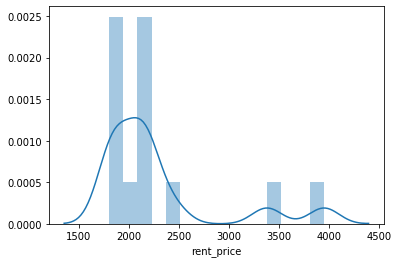

In [76]:
import seaborn as sns
sns.distplot(toronto_rent['rent_price'],bins=15)

# Most of the apartment rental price is around $2000

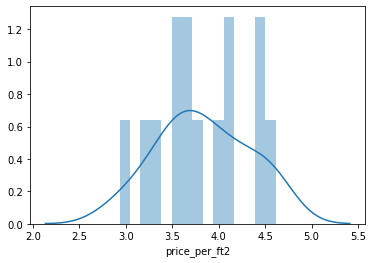

In [77]:
import seaborn as sns
sns.distplot(toronto_rent['price_per_ft2'],bins=15)

# Based on observation, the average price per aquare feet is around $3.50

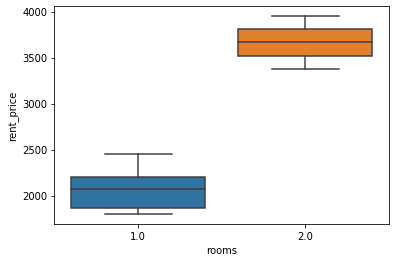

In [78]:
sns.boxplot(x='rooms', y= 'rent_price', data=toronto_rent)


## Map of Toronto apartments for rent
### The popups will indicate the address and the monthly price for rent thus making it convenient to select the target appartment with the price condition estipulated (max US2500) 

In [80]:
# create map of Toronto using latitude and longitude values from Nominatim
latitude = 43.6532
longitude= -79.3832

map_toronto_rent = folium.Map(location=[latitude, longitude], zoom_start=12.5)

# add markers to map
for lat, lng, label in zip(toronto_rent['lat'], toronto_rent['long'],'$ ' + toronto_rent['rent_price'].astype(str)+ ',  '+ toronto_rent['address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_rent) 
    

map_toronto_rent

## Map of Toronto showing the places for rent and the cluster of venues¶
### Now, one can point to a rental place for price and address location information while knowing the cluster venues around it.
### This is an insightful way to explore rental possibilites

In [81]:
# create map of Toronto using latitude and longitude values from Nominatim
latitude = 43.6532
longitude= -79.3832

# create map with clusters
kclusters=5
map_clusters2 = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters2)

# add markers to map for rental places
for lat, lng, label in zip(toronto_rent['lat'], toronto_rent['long'],'$ ' + toronto_rent['rent_price'].astype(str)+ toronto_rent['address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_clusters2)  
    
    # Adds tool to the top right
from folium.plugins import MeasureControl
map_toronto_rent.add_child(MeasureControl())

# FMeasurement ruler icon to establish distnces on map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_toronto_rent)

map_clusters2

## Now one can explore a particular rental place and its venues in detail
### In the map above, examination of appartments with rental place below 2500/month is straightforwad while knowing the venues around it.
### We could find an appartment with at the right price and in a location with desirable venues. The next step is to see if it is located near a subway metro station, in next cells work

In [83]:

## kk is the cluster number to explore
kk = 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == kk, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Burger Joint,Ice Cream Shop,Spa,Bakery,Chinese Restaurant
35,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry


## Read csv file that produced the subway stations list with geodata¶


In [91]:
toronto_sub=pd.read_csv('toronto_subway.csv')
print(toronto_sub.shape)
toronto_sub

(22, 6)


,sub_station,sub_address,lat,long,Unnamed: 4,Unnamed: 5
0,Museum,"75 Queen's Park Toronto, Ontario Canada",43.666727,-79.392753,NaN,NaN
1,union,"‎65 Front Street West, ‎Toronto, Ontario Canada",43.644903,-79.381836,NaN,NaN
2,Osgoode,"‎181 Queen Street West, Toronto, Ontario Canada",43.650596,-79.386919,NaN,NaN
3,Queen,"3 Queen Street East Toronto, Ontario Canada",43.652554,-79.378199,NaN,NaN
4,Dupont,"263 Dupont Street Toronto, Ontario Canada",43.674776,-79.406824,NaN,NaN
5,St. Andrew,"173 King Street West, Toronto, Ontario Canada",43.647492,-79.385118,NaN,NaN
6,King,"3 King Street East, Toronto, Ontario Canada",43.649067,-79.377801,NaN,NaN
7,Kipling,"950 Kipling Avenue Toronto, Ontario Canada",43.640273,-79.534708,NaN,NaN
8,Bathurst,"819 Bathurst Street Toronto, Ontario Canada",43.640079,-79.401135,NaN,NaN
9,Oldmill,"2672 Bloor Street West Toronto, Ontario Canada",43.649666,-79.495176,NaN,NaN


In [93]:
toronto_sub.drop(toronto_sub.tail(2).index,inplace=True) # drop last two rows
toronto_sub.drop(['Unnamed: 4', 'Unnamed: 5'], axis = 1, inplace=True) # drop last two columns
toronto_sub

,sub_station,sub_address,lat,long
0,Museum,"75 Queen's Park Toronto, Ontario Canada",43.666727,-79.392753
1,union,"‎65 Front Street West, ‎Toronto, Ontario Canada",43.644903,-79.381836
2,Osgoode,"‎181 Queen Street West, Toronto, Ontario Canada",43.650596,-79.386919
3,Queen,"3 Queen Street East Toronto, Ontario Canada",43.652554,-79.378199
4,Dupont,"263 Dupont Street Toronto, Ontario Canada",43.674776,-79.406824
5,St. Andrew,"173 King Street West, Toronto, Ontario Canada",43.647492,-79.385118
6,King,"3 King Street East, Toronto, Ontario Canada",43.649067,-79.377801
7,Kipling,"950 Kipling Avenue Toronto, Ontario Canada",43.640273,-79.534708
8,Bathurst,"819 Bathurst Street Toronto, Ontario Canada",43.640079,-79.401135
9,Oldmill,"2672 Bloor Street West Toronto, Ontario Canada",43.649666,-79.495176


## MAP of Toronto showing the location of subway stations


In [94]:
# map subway stations 
# create map of Toronto using latitude and longitude values obtain previoulsy via Moninatim geolocator
latitude = 43.6532
longitude= -79.3832

map_torontosub1 = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers of subway locations to map
for lat, lng, label in zip(toronto_sub['lat'], toronto_sub['long'],  toronto_sub['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_torontosub1) 
map_torontosub1


## 4.0 Results
## ONE CONSOLIDATE MAP
### Let's consolidate all the required inforamtion to make the apartment selection in one map
### Map of Toronto with rental places, subway locations and cluster of venues
### Red dots are Subway stations, Blue dots are apartments available for rent, Bubbles are the clusters of venues

In [96]:
# create map of Toronto using latitude and longitude values from Nominatim
latitude = 43.6532
longitude= -79.3832

map_toronto_one = folium.Map(location=[latitude, longitude], zoom_start=13.3)

# add markers to map
for lat, lng, label in zip(toronto_rent['lat'], toronto_rent['long'],'$ ' + toronto_rent['rent_price'].astype(str)+ ', '+toronto_rent['address']):      
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto_one) 
    
    # add markers of subway locations to map
for lat, lng, label in zip(toronto_sub['lat'], toronto_sub['long'],  toronto_sub['sub_station'].astype(str) ):
    label = folium.Popup(label, parse_html=True)
    folium.RegularPolygonMarker(
        [lat, lng],
        number_of_sides=6,
        radius=6,
        popup=label,
        color='red',
        fill_color='red',
        fill_opacity=2.5,
    ).add_to(map_toronto_one) 


# set color scheme for the clusters
kclusters=5
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_toronto_one)

    # Adds tool to the top right
from folium.plugins import MeasureControl
map_toronto_one.add_child(MeasureControl())

# Measurement ruler icon tool to measure distances in map
from folium.plugins import FloatImage
url = ('https://media.licdn.com/mpr/mpr/shrinknp_100_100/AAEAAQAAAAAAAAlgAAAAJGE3OTA4YTdlLTkzZjUtNDFjYy1iZThlLWQ5OTNkYzlhNzM4OQ.jpg')
FloatImage(url, bottom=5, left=85).add_to(map_toronto_one)

map_toronto_one

## Problem Resolution - Select the apartment for rent
### The above consolidate map was used to explore options.
### After examining, I have chosen this locations that meet the requirements which will assess to make a choice.
Apartment 1: 763 Bay Street, Toronto near to 'Central Bay Street' neighbourhood, 'Dundas' station, Cluster # 2  -->  Monthly rent : $2450 Dollars

## Venues for Apartment 1 - Cluster 2


In [98]:
## kk is the cluster number to explore
kk = 2
toronto_merged.loc[toronto_merged['Cluster Labels'] == kk, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
34,Central Bay Street,Coffee Shop,Sandwich Place,Italian Restaurant,Café,Japanese Restaurant,Burger Joint,Ice Cream Shop,Spa,Bakery,Chinese Restaurant
35,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Coffee Shop,Harbor / Marina,Plane,Rental Car Location,Sculpture Garden,Boutique,Bar,Boat or Ferry


## Apartment Selection
### Using the "one map" above, I was able to explore all possibilities since the popups provide the information needed for a good decision.
Apartment 1 rent cost is US2450 slightly below the US2500 budget. Apartment 1 is located very near to subway station and near to cluster 2 which is in Central Bay Street Neighbourhood. I can walk to work place and use subway to go other places. 
<br>Based on current Singapore venues, I feel that Cluster 2 type of venues is a closer resemblance to my current place. That means that APARTMENT 1 is a good choice for me.

## Conclustion 

<b>In Conclusion, I feel that this is a very good exercise to take what I have learned in Data Science to apply in real world project. Thank you. </b>